In [86]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
np.random.seed(29)

plt.rc('axes.spines', top=False, right=False)
plt.rc('figure', figsize=(9, 6))

# 1. How likely is it that you roll doubles when rolling two dice?

In [87]:
n_trials = nrows = 10_000
n_dice = ncols = 2
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [2, 5],
       [1, 4],
       [4, 6]])

In [88]:
df = (pd.DataFrame(rolls))
df

,0,1
0,6,4
1,5,6
2,3,1
3,1,2
4,2,1
...,...,...
9995,5,2
9996,3,6
9997,2,5
9998,1,4


In [89]:
pd.DataFrame(rolls).apply(lambda row: row[0] == row [1], axis=1).mean()


0.1709

In [90]:
#all together
n_trials = nrows = 10_000
n_dice = ncols = 2
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
pd.DataFrame(rolls).apply(lambda row: row[0] == row [1], axis=1).mean()

0.1716

In [166]:
# alternate easier way (Ryan)

a = np.random.choice ([1,2,3,4,5,6], size = 100_000)
b = np.random.choice ([1,2,3,4,5,6], size = 100_000)
(a == b).mean()

0.16505

# 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [91]:
np.random.seed(42)
n=8
p=0.5
# let us repeat our experiment for 10_000 times
size=10_000
x=np.random.binomial(n=n, p=p, size=size)
# Prints count of how often count of heads occurs
[np.equal(x,i).sum() for i in range(n)]

[32, 309, 1151, 2196, 2782, 2130, 1072, 293]

In [92]:
# Prints pobability of seeing each event
probs_100 = [np.equal(x,i).mean() for i in range(n)]
print(probs_100)

[0.0032, 0.0309, 0.1151, 0.2196, 0.2782, 0.213, 0.1072, 0.0293]


Text(0, 0.5, 'Probability')

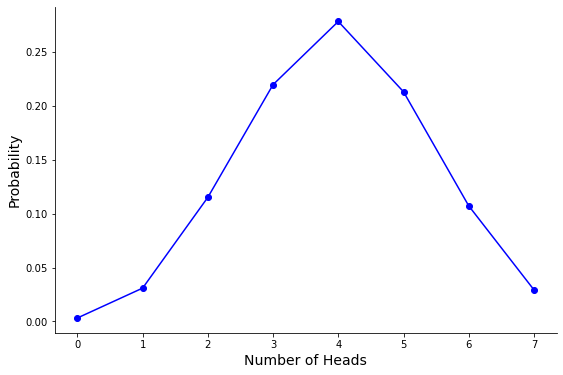

In [93]:
# Produces Histogram of Answers
plt.xticks(range(n))
plt.plot(list(range(n)), probs_100, color='blue', marker='o')
plt.xlabel('Number of Heads',fontsize=14)
plt.ylabel('Probability',fontsize=14)

# 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [148]:
#how likely to see two data science student billboards
trial = 10_000
prob = [0.75, 0.25]
billboard = 2
# 1 web, 0 data
n_views = np.random.choice([1, 0], size=(trial, billboard), p=prob)
df = pd.DataFrame(n_views)  
df["data"] = df.sum(axis=1) == 0
df.data.mean()

0.0634

# 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [95]:
#distribution
poptarts = np.round(np.random.normal(3, 1.5, size=(100_000, 5)))
poptarts

array([[2., 4., 5., 1., 6.],
       [3., 2., 4., 2., 3.],
       [2., 2., 4., 3., 1.],
       ...,
       [2., 4., 7., 4., 5.],
       [2., 3., 2., 2., 2.],
       [2., 3., 5., 4., 2.]])

In [96]:
# total per week
demand = poptarts.sum(axis=1)
demand

array([18., 14., 12., ..., 22., 11., 16.])

In [97]:
# weeks less than 17 poptarts
(demand < 17).mean()

0.67096

# 5. Compare Heights
   - Men have an average height of 178 cm and standard deviation of 8cm.
   - Women have a mean of 170, sd = 6cm.
   - If a man and woman are chosen at random, P(woman taller than man)?

In [170]:
men = np.round(np.random.normal(178, 8, size=100_000))
men

array([173., 176., 183., ..., 179., 183., 178.])

In [171]:
women = np.round(np.random.normal(170, 6, size=100_000))
women

array([167., 162., 166., ..., 167., 164., 172.])

In [172]:
(women > men).mean()

0.1975

# 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

   - What is the probability that we observe an installation issue within the first 150 students that download   
     anaconda?

   - How likely is it that 450 students all download anaconda without an issue?

In [115]:
#50 Installations
trial = 10_000
prob = [1/250, 249/250]
student = 50
#0 is fail, 1 is success
install = np.random.choice([0, 1], size=(trial, student), p=prob)
df = pd.DataFrame(install)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [102]:
df["success"] = df.sum(axis=1) == student
df.success.mean()

0.8163

In [179]:
#100 Installations
trial = 10_000
prob = [1/250, 249/250]
student = 100
install = np.random.choice([0, 1], size=(trial, student), p= prob)
df = pd.DataFrame(install)
df["success"] = df.sum(axis=1) == student
df.success.mean()

0.6723

In [182]:
#With in the first 150 Installations
trial = 10_000
prob = [1/250, 249/250]
student = 150
install = np.random.choice([0, 1], size=(trial, student), p=prob)
df = pd.DataFrame(install)
df["success"] = df.sum(axis=1) < student
df.success.mean()

0.4531

In [181]:
#450 Installations
trial = 10_000
prob = [1/250, 249/250]
student = 450
install = np.random.choice([0, 1], size=(trial, student), p=prob)
df = pd.DataFrame(install)
df["success"] = df.sum(axis=1) == student
df.success.mean()

0.1602

# 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

   - How likely is it that a food truck will show up sometime this week?

In [135]:
#how likely to not see a truck in 3 days
trial = 10_000
prob = [.7, .3]
days_no = 3
# 1 truck, 0 no_truck
truck = np.random.choice([1, 0], size=(trial, days_no), p=prob)
truck
df = pd.DataFrame(truck)
df["no_truck"] = df.sum(axis=1) == 0
df.no_truck.mean()

0.0264

In [137]:
#how likely to see a truck this week
trial = 10_000
prob = [.7, .3]
days_no = 7
# 1 truck, 0 no_truck
truck = np.random.choice([1, 0], size=(trial, days_no), p=prob)
truck
df = pd.DataFrame(truck)
df["no_truck"] = df.sum(axis=1) > 0
df.no_truck.mean()

0.9997

# 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [175]:
#how likely to share birthday (n =23)
bday_23 = np.random.randint(1, 366, (10_000, 23))
(pd.DataFrame(bday_23).nunique(axis=1) < 23).mean()

0.5117

In [174]:
#how likely to share birthday (n =20)
bday_20 = np.random.randint(1, 366, (10_000, 20))
(pd.DataFrame(bday_20).nunique(axis=1) < 20).mean()

0.4186

In [163]:
#how likely to share birthday (n =40)
bday_40 = np.random.randint(1, 366, (10_000, 40))
(pd.DataFrame(bday_40).nunique(axis=1) < 40).mean()

0.8926